|<img src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 2.4, écoulement d'un film de fluide Newtonien dans une conduite annulaire

>Le développement fait dans Transport Phenomena sera répété ici en développant les solutions avec le calculateur formel sympy et en traçant la solution avec sympy.plot.
>Vous pouvez suivre le développement détaillé à l'aide du livre et voir comment les équations de bilans initiales deviennent les profils de vitesse, de force, débit, etc...<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-2-Section-2-4.png'>

In [15]:
# Paramètres, variables et fonctions, presque identique à la section 2.3
#
r,delta_r,L,mu,R,P_0,P_L,kappa,rho,g=sp.symbols('r,delta_r,L,mu,R,P_0,P_L,kappa,rho,g')    
C1=sp.symbols('C1')                                                         
phi_rz,phi_zz=sp.symbols('phi_rz,phi_zz')

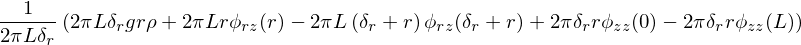

In [16]:
#
# équation identique à la section 2.3
#
#
# Équation du bilan des forces
#
eq=2*sp.pi*r*L*phi_rz(r)      -2*sp.pi*(r+delta_r)*L*phi_rz(r+delta_r)
eq=eq+2*sp.pi*delta_r*r*phi_zz(0)-2*sp.pi*r*delta_r*phi_zz(L)
eq=eq+2*sp.pi*r*delta_r*L*rho*g
#eq=r*phi_rz(r)/delta_r-(r+delta_r)*phi_rz(r+delta_r)/delta_r+r*P_0/L-r*P_L/L 
#
# pose de la limite quand dr tends vers 0
#
eq=eq/(2*sp.pi*L*delta_r)
display(eq)

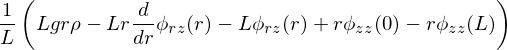

In [17]:
eq1=sp.limit(eq,delta_r,0).doit()
display(eq1)

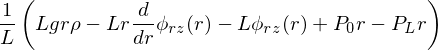

In [18]:
eq1=eq1.subs(phi_zz(0),P_0)     # les termes de convection s'annulent comme en 2.2
eq1=eq1.subs(phi_zz(L),P_L)     # mais il reste le terme de pression
display(eq1)

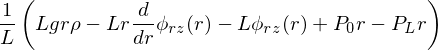

In [19]:
eq1=sp.limit(eq1,delta_r,0).doit()
display(eq1)

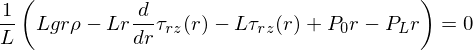

In [20]:
#
# encore identique à 2.3
#
tau_rz=sp.symbols('tau_rz')
eq2=sp.Eq(eq1.subs(phi_rz(r),tau_rz(r)))
display(eq2)

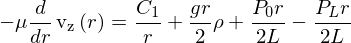

In [21]:
eq2=sp.dsolve(eq2)
v_z=sp.Function('v_z')(r)
newton=-mu*sp.Derivative(v_z,r)
eq3=eq2.subs(tau_rz(r),newton)
display(eq3)

Maintenant la différence avec la section 2.3 arrive, la condition limite pour $C_1$ n'est pas la même car r=0 n'est pas partie du domaine.

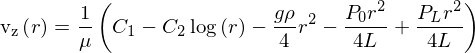

In [22]:
eq4=sp.dsolve(eq3,v_z)
display(eq4)

Maintenant on peut trouver les deux constantes inconnues en solutionnant les deux équations à deux inconnues provenant de la pose des conditions aux limites:


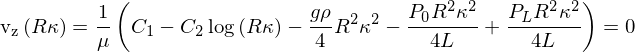

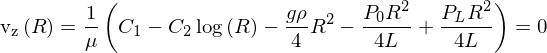

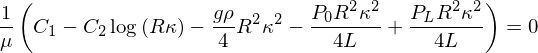

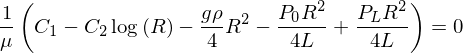

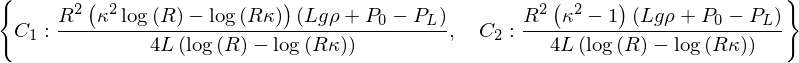

In [23]:
display(sp.Eq(eq4.subs(r,kappa*R),0),sp.Eq(eq4.subs(r,R      ),0))
# juste pour voir le terme de gauche de l'équation avec le terme de droite, on éliminera le terme de gauche pour solutionner
condition_1=sp.Eq(eq4.rhs.subs(r,kappa*R))
condition_2=sp.Eq(eq4.rhs.subs(r,R      ))
display(condition_1,condition_2)
constante=sp.solve([condition_1,condition_2], sp.symbols('C1,C2'))
display(constante)

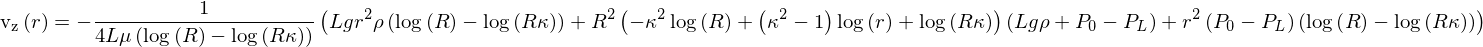

In [24]:
v_z=eq4.subs(constante)
display(v_z.simplify())

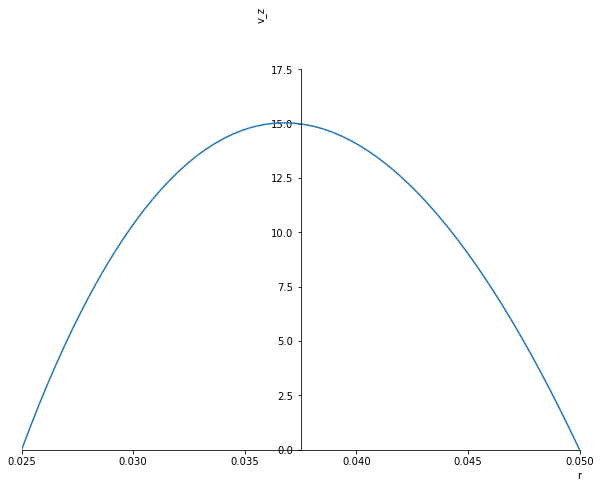

In [25]:
#
# Maintenant traçons le profil en donnant des valeurs de paramètres réalistes
#
# Remarquez ici que la gravité est négative sur la figure 2.4-1
# 
# Changez la hauteur, la pression en 0, etc... pour voir le changement de direction de 
# l'écoulement. Quelle est la pression nécessaire pour pousser le fluide vers le haut 
# si la hauteur de la colonne est de 10 mètres?
#
dictionnaire={'rho':1000, 'mu':0.001,'g':-9.81,
              'R':0.05, 'L':10,'P_0':100000,'P_L':0,'kappa':0.5}
v_z=v_z.rhs.subs(dictionnaire).evalf()
R=R.subs(dictionnaire)
kappa=kappa.subs(dictionnaire)
display(v_z)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=10,8
sp.plot(v_z,(r,kappa*R,R),ylim=[0,20],ylabel='v_z')

#### * 1 Exemple de calcul: trouvez la position du maximum de vitesse, c'est le $ \lambda R$ de la figure 2.4-1 

#### La solution est donc l'endroit ou la dérivée de v est nulle, donc on cherche $\lambda R $ tel que $ \frac {dv_z} {dr} |_{r = \lambda R} = 0$

In [26]:
lam=sp.solve(sp.diff(v_z,r))      # Je cherche l'endroit ou la dérivée est nulle.
print('Position du maximum (le lambda R de Bird)')
maxi=lam[1]                     # la deuxième racine car la première est négative.
display(maxi)

Position du maximum (le lambda R de Bird)


#### * 2 Calculez la pression $P_0$ requise pour pour que l'écoulement soit nul en gardant une hauteur de 10 mètres. Vérifiez ensuite graphiquement que l'écoulement est bien nul en tracant le graphe de la vitesse.